## Import the Google Drive folder to access the Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
data_drive_location="/content/drive/MyDrive/FDA/Projects/Project1/"

Mounted at /content/drive


## Import all the required libraries


In [ ]:
!pip install validclust

ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics.cluster import fowlkes_mallows_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

## Load the Data

In [ ]:
df1 = pd.read_csv(data_drive_location+'Data1.csv')
df2 = pd.read_csv(data_drive_location+'Data2.csv')
df3 = pd.read_csv(data_drive_location+'Data3.csv')
df4 = pd.read_csv(data_drive_location+'Data4.csv')
df5 = pd.read_csv(data_drive_location+'Data5.csv')
df6 = pd.read_csv(data_drive_location+'Data6.csv')
df7 = pd.read_csv(data_drive_location+'Data7.csv')
df8 = pd.read_csv(data_drive_location+'Data8.csv')

# Task 1
## Data sets,  “Data1.csv”, “Data2.csv”, “Data3.csv”, “Data4.csv”, “Data5.csv”, “Data6.csv”, “Data7.csv”, “Data8.csv” contain the data points and their respective class information. For each of the datasets follow the below steps

### Methods for visual clarity and class prediction numbers

> The below method kmeans_no_of_clusters_predictor is actually a elbow diagram representor, this method can be used to identify the number of optimal clusters

In [ ]:
def kmeans_no_of_clusters_predictor(data,data_start_column,data_end_column):
  data_k =[]
  data_wcss = []
  for i in range(1,10):
    data_model = KMeans(n_clusters=i)
    data_model.fit(data.iloc[:,data_start_column:data_end_column])
    data['predicted_class'] = data_model.labels_
    data_k.append(i)
    data_wcss.append(data_model.inertia_)
  sns.lineplot(data_k,data_wcss)

> plot_dendrogram is a method that helps us to visualize the Dendogram, which is hierarchical.


> This Method was taken as a reference from the [scikit-learn repo](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # 
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
      counts[i] = current_count

  linkage_matrix = np.column_stack(
    [model.children_, model.distances_, counts]
  ).astype(float)

  dendrogram(linkage_matrix, **kwargs)


### For Data set - data1.csv

#### Use K-means and hierarchical clustering methods to generate clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


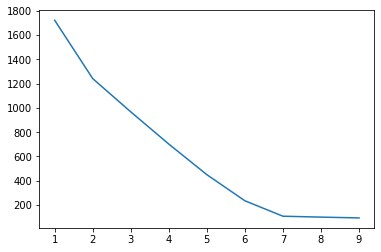

In [ ]:
kmeans_no_of_clusters_predictor(data=df1, data_start_column=1, data_end_column=4)

##### As per the above diagram using the elbow plot we can see that the data has 7 Categoriies

###### with the K Means

In [ ]:
df1_data_model = KMeans(n_clusters=7, random_state=0)
df1_data_model.fit(df1.iloc[:,1:4]  )
df1['predicted_class'] = df1_data_model.labels_
# df1

In [ ]:
df1

,Unnamed: 0,X1,X2,X3,Class,predicted_class
0,1,-0.063274,0.027734,0.022683,1,3
1,2,-0.000731,0.048211,0.069198,1,3
2,3,-0.060767,-0.009080,0.053085,1,3
3,4,0.013252,-0.011876,0.055324,1,3
4,5,-0.054508,-0.003813,0.001738,1,3
...,...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7,1
208,209,0.396046,-0.858377,-3.126866,7,1
209,210,-0.406362,-0.334541,-2.885598,7,1
210,211,-0.299275,0.071281,-3.642585,7,1


In [ ]:
predict = df1['predicted_class']

###### with the Hierarchical clustering methods

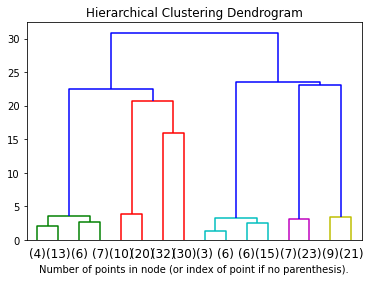

In [ ]:
hierarchical_cluster_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hierarchical_cluster_model = hierarchical_cluster_model.fit(df1.iloc[:,1:4])

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hierarchical_cluster_model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
hierarchical_cluster_model

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

#### Evaluate the performance of the clustering algorithm using external validation metrics

> A cluster performance can be be validated with the certain values like Contingency Metrics, precision score, recall score Metrics, jaccard coefficient, rand score, FM score

In [ ]:
print("External Validation metrics- Supervised")
print("Contingency Metrics : " + str(metrics.cluster.contingency_matrix(y1, predict)))
print("precision score : " + str(metrics.precision_score(y1, predict, average='micro')))
print("recall score Metrics : " + str(metrics.recall_score(y1, predict, average='micro')))
print("jaccard coefficient : " + str(metrics.jaccard_score(y1, predict, average='micro')))
print("rand score : " + str(metrics.adjusted_rand_score(y1, predict)))
print("FM score : " + str(fowlkes_mallows_score(y1, predict)))

External Validation metrics- Supervised


NameError: ignored

#### Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df1.iloc[:,1],df1.iloc[:,2], df1.iloc[:,3], c=df1.iloc[:,4])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')

#### Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df1.iloc[:,1],df1.iloc[:,2], df1.iloc[:,3], c=df1.iloc[:,5])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')

### For Data set - data2.csv

#### Use K-means and hierarchical clustering methods to generate clusters

In [ ]:
kmeans_no_of_clusters_predictor(data=df2, data_start_column=1, data_end_column=4)

##### As per the above diagram using the elbow plot we can see that the data has 4 Categoriies

###### with the K Means

In [ ]:
df2_data_model = KMeans(n_clusters=4)
df2_data_model.fit(df2.iloc[:,1:4])
df2['predicted_class'] = df2_data_model.labels_
# df2

#### Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df2.iloc[:,1],df2.iloc[:,2], df2.iloc[:,3], c=df2.iloc[:,4])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')

#### Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df2.iloc[:,1],df2.iloc[:,2], df2.iloc[:,3], c=df2.iloc[:,5])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')

### For Data set - data3.csv

#### Use K-means and hierarchical clustering methods to generate clusters

In [ ]:
kmeans_no_of_clusters_predictor(data=df3, data_start_column=1, data_end_column=4)

##### As per the above diagram using the elbow plot we can see that the data has 4 Categoriies

###### with the K Means

In [ ]:
df3_data_model = KMeans(n_clusters=4)
df3_data_model.fit(df3.iloc[:,1:4])
df3['predicted_class'] = df3_data_model.labels_

#### Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df2.iloc[:,1],df2.iloc[:,2], df2.iloc[:,3], c=df2.iloc[:,4])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')

#### Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
plot_figure = plt.gca(projection= '3d')
plot_figure.scatter(df2.iloc[:,1],df2.iloc[:,2], df2.iloc[:,3], c=df2.iloc[:,5])
plot_figure.set_xlabel('X1')
plot_figure.set_ylabel('X2')
plot_figure.set_zlabel('X3')